#### Contents

##### 01 Import libraries and data
##### 02 Split data
##### 03 Run grid search optimization
##### 04 Run random forest classifier with new parameters
##### 05 Calculate Feature Importances

#### 01 Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import random

2024-11-15 20:21:48.521856: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
path = r'/Users/Owner/Documents/CareerFoundry/Machine Learning Specialization/Data Sets'

In [4]:
df_obs = pd.read_csv(os.path.join(path, 'Observations_clean.csv'), index_col = False)

In [5]:
df_obs.head()

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101                  7            0.85           1.018   
1  19600102                  6            0.84           1.018   
2  19600103                  8            0.90           1.018   
3  19600104                  3            0.92           1.018   
4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [6]:
df_pleasant = pd.read_csv(os.path.join(path, 'Pleasant_weather_cleaned.csv'), index_col = False)

In [7]:
df_pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [8]:
#Reduce observation dataset to a single decade
df_obs2 = df_obs[df_obs['DATE'].astype(str).str.contains('199')] #<-----INSERT YEAR HERE
df_obs2

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958  19900101                  0            0.83          1.0217   
10959  19900102                  2            0.84          1.0238   
10960  19900103                  8            0.89          1.0231   
10961  19900104                  2            0.77          1.0265   
10962  19900105                  7            0.81          1.0286   
...         ...                ...             ...             ...   
14605  19991227                  7            0.74          0.9953   
14606  19991228                  8            0.88          0.9956   
14607  19991229                  8            0.84          1.0162   
14608  19991230                  7            0.80          1.0276   
14609  19991231                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
10958             -2.1            -3.6             1.2  ...   
10959             -1.8            -3.9             1.7  ...   
10960             -2.2            -4.2             0.4  ...   
10961             -0.7            -3.1             2.2  ...   
10962              0.0            -3.1             2.6  ...   
...                ...             ...             ...  ...   
14605              5.0             1.5             6.5  ...   
14606              2.4             1.0             3.4  ...   
14607              1.8             1.0             2.7  ...   
14608              1.1            -0.3             3.4  ...   
14609              0.7            -0.7             1.9  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958                -0.3                     3               0.82   
10959                -3.4                     5               0.79   
10960                -2.6                     4               0.90   
10961                 0.5                     6               0.93   
10962                 0.8                     4               0.91   
...                   ...                   ...                ...   
14605                 1.6                     7               0.75   
14606                 1.0                     3               0.73   
14607                -1.1                     5               0.81   
14608                -2.5                     8               0.94   
14609                -7.0                     6               0.94   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   
...                  ...                        ...                     ...   
14605             0.9954                       0.15                    0.41   
14606             1.0102                       0.41                    0.03   
14607             1.

In [9]:
#Reduce pleasant weather dataset to a single decade
df_pleasant2 = df_pleasant[df_pleasant['DATE'].astype(str).str.contains('199')] #<-----INSERT YEAR HERE
df_pleasant2

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   
...         ...                     ...                        ...   
14605  19991227                       0                          0   
14606  19991228                       0                          0   
14607  19991229                       0                          0   
14608  19991230                       0                          0   
14609  19991231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0    

In [10]:
#Drop the DATE data as those numbers are not scaled with the rest.
df_pleasant_ready = df_pleasant2.drop(['DATE'], axis=1)

In [11]:
#check output
df_pleasant_ready.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958                       0                          0   
10959                       0                          0   
10960                       0                          0   
10961                       0                          0   
10962                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0                      0   
10960                          0                      0   
10961                          0                      0   
10962                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
10958                           0                           0   
10959                           0                           0   
10960                           0                           0   
10961                           0                           0   
10962                           0                           0   

       VALENTIA_pleasant_weather  
10958                          0  
10959                          0  
10960                          0  
10961                          0  
10962                          0

In [12]:
#Drop the DATE data as those numbers are not scaled with the rest.
df_observations_ready = df_obs2.drop(['DATE'], axis=1)

In [13]:
#check output
df_observations_ready.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958  ...                -0.3                     3               0.82   
10959  ...                -3.4                     5               0.79   
10960  ...                -2.6                     4               0.90   
10961  ...                 0.5                     6               0.93   
10962  ...                 0.8                     4               0.91   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
10958                2.0                 6.9                4.5   
10959                0.1                 7.3                4.7   
10960                4.9                 7.8                4.8   
10961                0.0                 6.5                2.0   
10962                1.2                 9.4                7.2   

       VALENTIA_temp_max  
10958                9.4  
10959                9.9  
10960               10.7  
10961               11.0  
10962               11.7  

[5 rows x 135 columns]

In [14]:
print(df_observations_ready.shape)

(3652, 135)


In [15]:
print(df_pleasant_ready.shape)

(3652, 15)


#### 02 Split data

In [17]:
X = df_observations_ready
y = df_pleasant_ready
print(X.shape)
print(y.shape)
X

(3652, 135)
(3652, 15)


BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958  ...                -0.3                     3               0.82   
10959  ...                -3.4                     5               0.79   
10960  ...                -2.6                     4               0.90   
10961  ...                 0.5                     6               0.93   
10962  ...                 0.8                     4               0.91   
...    ...                 ...                   ...                ...   
14605  ...                 1.6                     7               0.75   
14606  ...                 1.0                     3               0.73   
14607  ...                -1.1                     5               0.81   
14608  ...                -2.5                     8               0.94   
14609  ...                -7.0                     6               0.94   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   
...                  ...                        ...                     ...   
14605             0.9954      

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X.shape

(3652, 135)

In [20]:
y.shape

(3652, 15)

In [21]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

#### 03 Run grid search optimization

In [23]:
# creating a RF classifier
clf = RandomForestClassifier()

In [24]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
             'max_features':[15,50,100,125],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [25]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-2)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.439 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.432 total time=   1.4s
[CV 2/3] E

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

Search took 53.66953626871109 minutes


In [26]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6319824753559693


In [27]:
#RANDOM SEARCH

In [68]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(100, 400, step=50), #adjusting based on grid search output
              'max_features':randint(20,60), #adjusting based on grid search output
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [70]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [72]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-2, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 2/3] END criterion=gini, max_depth=80, max_features=26, min_samples_leaf=3, min_samples_split=6, n_estimators=350;, score=0.611 total time=  18.8s
[CV 2/3] END criterion=entropy, max_depth=70, max_features=48, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.632 total time= 1.1min
[CV 2/3] END criterion=entropy, max_depth=10, max_features=44, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.623 total time=  19.2s
[CV 2/3] END criterion=entropy, max_depth=60, max_features=50, min_samples_leaf=3, min_samples_split=6, n_estimators=250;, score=0.637 total time=  49.6s
[CV 2/3] END criterion=entropy, max_depth=70, max_features=54, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.633 total time=  38.4s
[CV 2/3] END criterion=gini, max_depth=None, max_features=47, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.642 total time=  19.7s
[CV 1/3] END crit

In [74]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 52, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best RANDOM search score is: 0.6352683461117197


In [76]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6319824753559693
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 52, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best RANDOM search score is: 0.6352683461117197


#### 04 Run random forest classifier with new parameters

In [84]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 250, max_depth=70, max_features=52, min_samples_leaf=1, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, max_features=52, n_estimators=250)

In [86]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6736035049288062


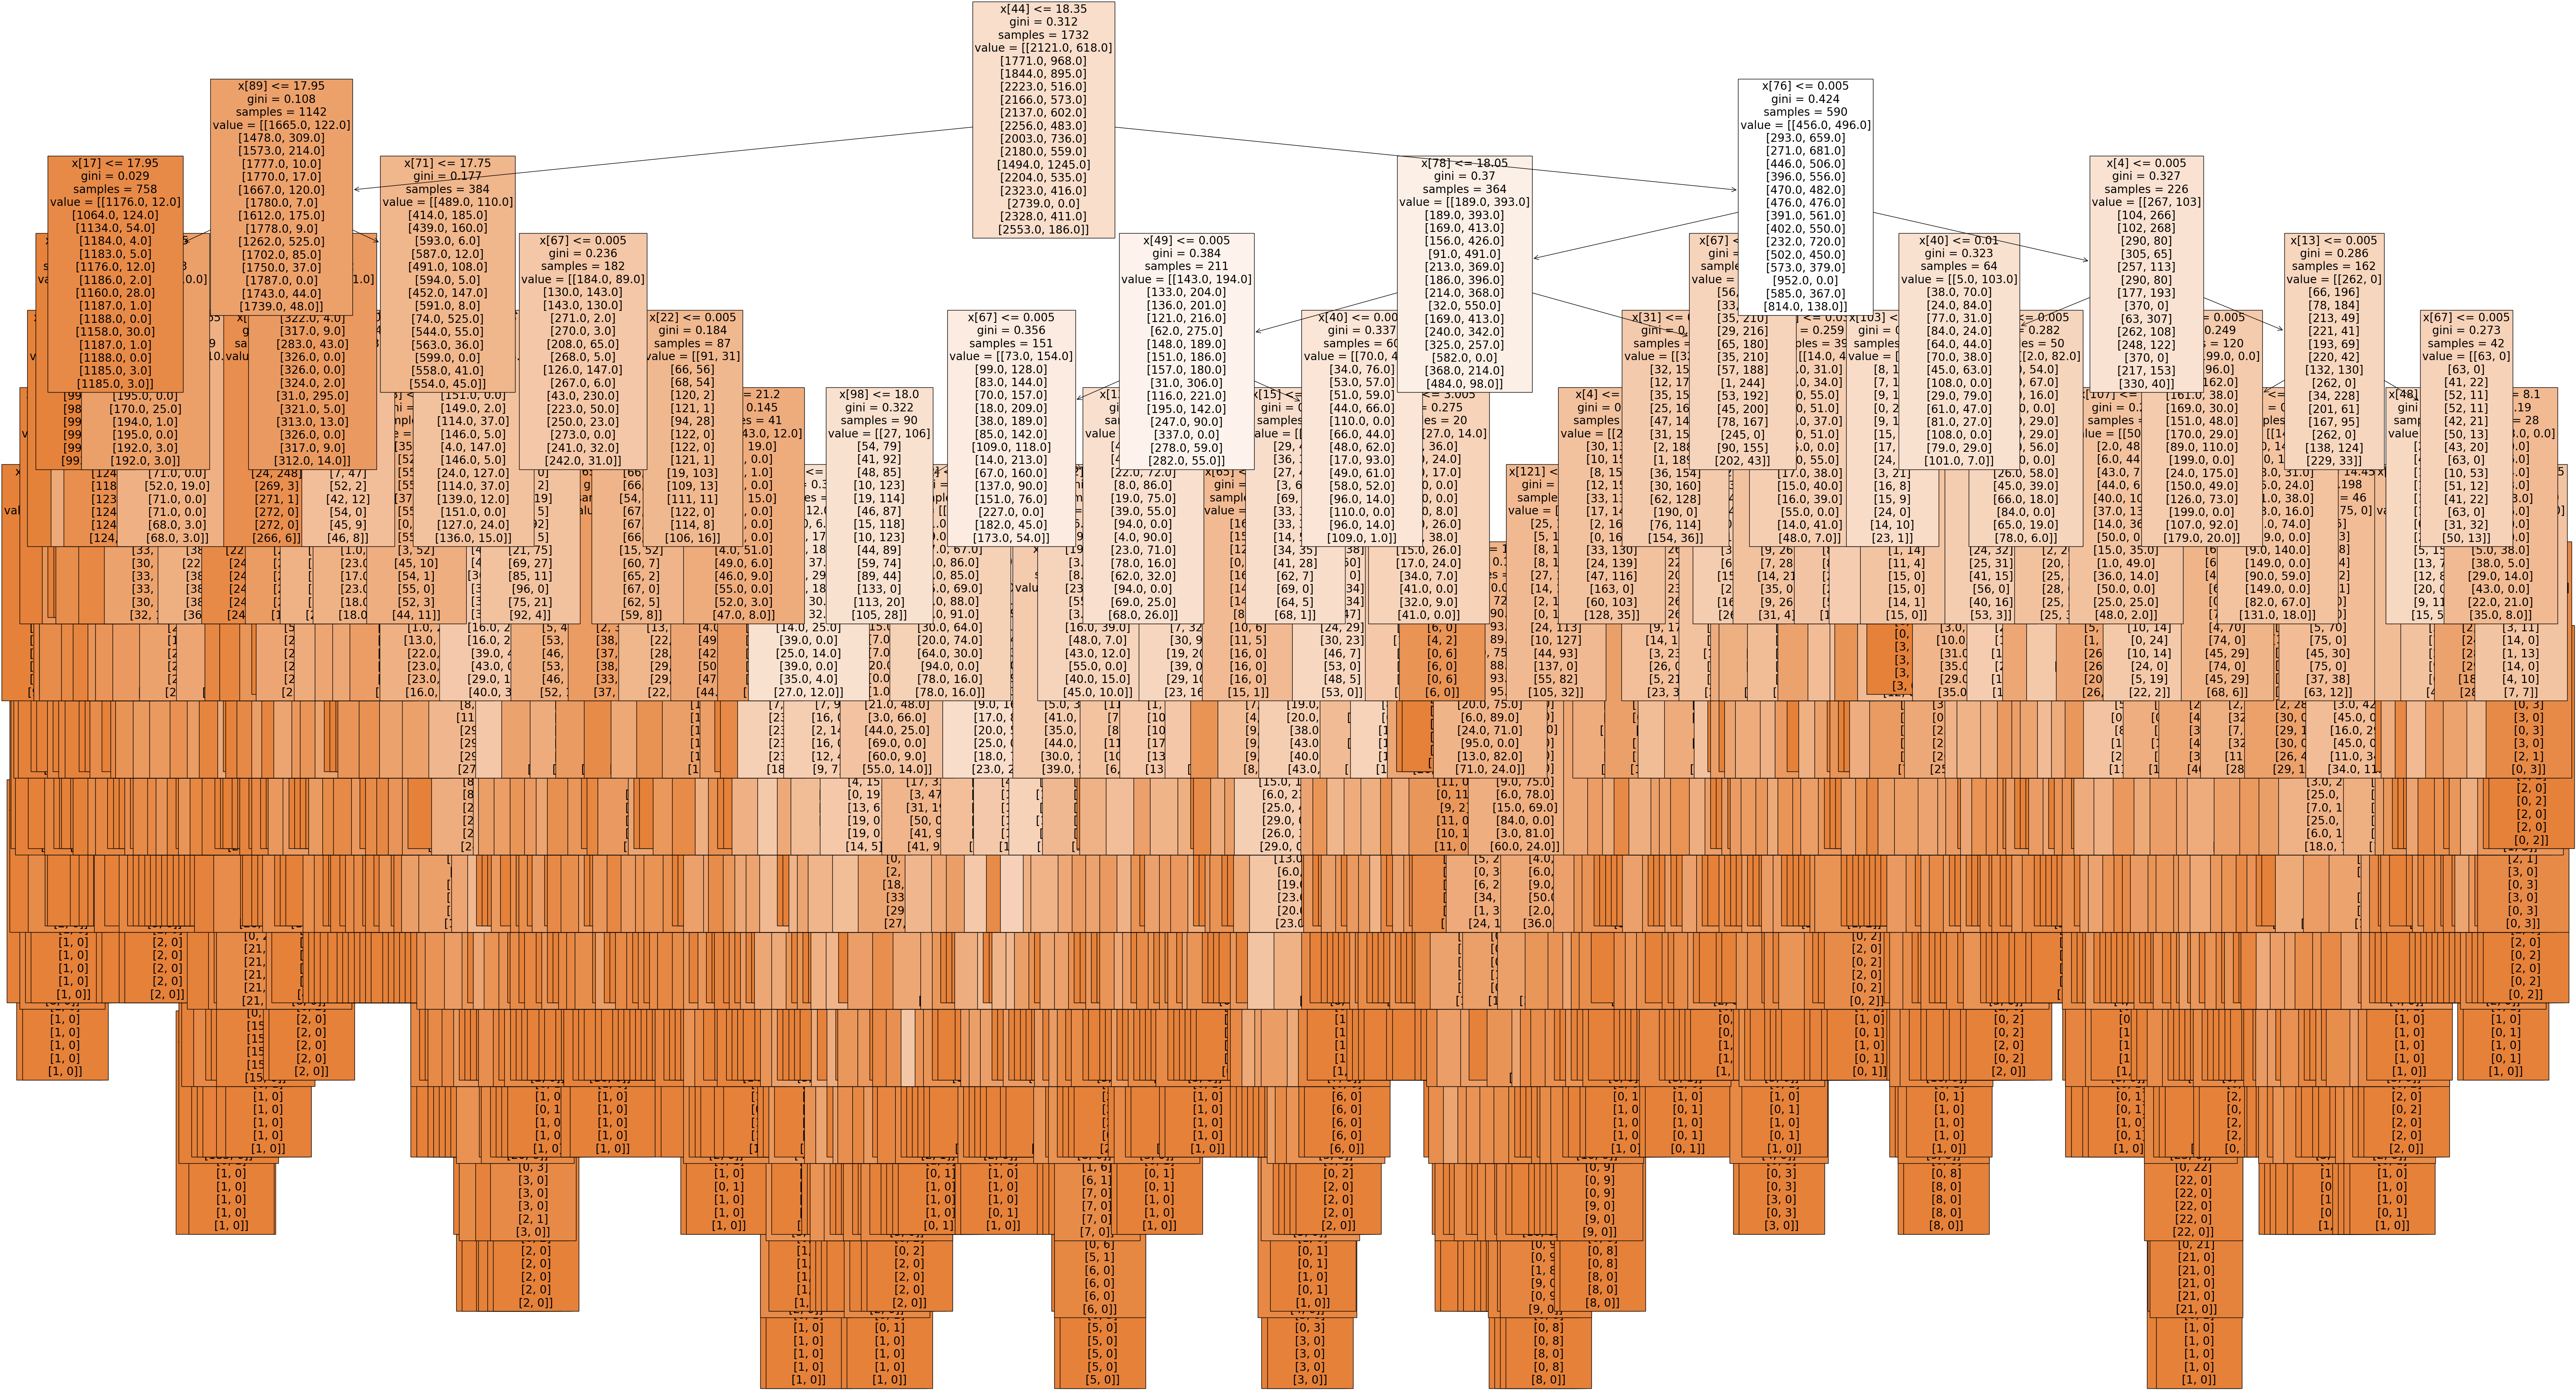

In [90]:
types = {0:'Unpleasant weather', 1:'Pleasant weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=types, filled=True);

In [92]:
fig.savefig(os.path.join(path,'optimized_random_forest_90s_all.png'), bbox_inches='tight')

#### 05 Calculate Feature Importances

In [95]:
#determine feature importances

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([0.00174749, 0.0023844 , 0.00206598, 0.0025913 , 0.01975098,
       0.00363376, 0.0086616 , 0.00175745, 0.02802704, 0.00265086,
       0.00252381, 0.00208831, 0.00245036, 0.03037677, 0.00326585,
       0.00366416, 0.00194975, 0.01016056, 0.0017475 , 0.00218732,
       0.00196104, 0.00221555, 0.02209301, 0.00278631, 0.00421749,
       0.00193225, 0.01719501, 0.00161724, 0.00186178, 0.00221805,
       0.00211971, 0.0197513 , 0.00245055, 0.00209986, 0.00179006,
       0.04533104, 0.0016921 , 0.00179505, 0.00193402, 0.00232235,
       0.02678265, 0.00462538, 0.00454955, 0.00179123, 0.08083691,
       0.00147457, 0.00265811, 0.00259291, 0.00281473, 0.01052713,
       0.00310225, 0.00363921, 0.00186167, 0.00928481, 0.00213798,
       0.00193195, 0.00211931, 0.01308653, 0.00232699, 0.01193905,
       0.00188464, 0.03706347, 0.00168742, 0.00153319, 0.00222998,
       0.00172171, 0.00231308, 0.03588456, 0.00266681, 0.004874  ,
       0.00185282, 0.01982448, 0.00304048, 0.0019273 , 0.00181

In [107]:
newarray = newarray.reshape(-1,9,15)
print(newarray.shape)
newarray

(1, 9, 15)


array([[[0.00174749, 0.0023844 , 0.00206598, 0.0025913 , 0.01975098,
         0.00363376, 0.0086616 , 0.00175745, 0.02802704, 0.00265086,
         0.00252381, 0.00208831, 0.00245036, 0.03037677, 0.00326585],
        [0.00366416, 0.00194975, 0.01016056, 0.0017475 , 0.00218732,
         0.00196104, 0.00221555, 0.02209301, 0.00278631, 0.00421749,
         0.00193225, 0.01719501, 0.00161724, 0.00186178, 0.00221805],
        [0.00211971, 0.0197513 , 0.00245055, 0.00209986, 0.00179006,
         0.04533104, 0.0016921 , 0.00179505, 0.00193402, 0.00232235,
         0.02678265, 0.00462538, 0.00454955, 0.00179123, 0.08083691],
        [0.00147457, 0.00265811, 0.00259291, 0.00281473, 0.01052713,
         0.00310225, 0.00363921, 0.00186167, 0.00928481, 0.00213798,
         0.00193195, 0.00211931, 0.01308653, 0.00232699, 0.01193905],
        [0.00188464, 0.03706347, 0.00168742, 0.00153319, 0.00222998,
         0.00172171, 0.00231308, 0.03588456, 0.00266681, 0.004874  ,
         0.00185282, 0.0198244

In [109]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.02474794, 0.109325  , 0.0435824 , 0.03793834, 0.06343218,
       0.17384546, 0.02822229, 0.07188087, 0.05841254, 0.02599406,
       0.05864165, 0.05640955, 0.04626647, 0.05280545, 0.1484958 ])

In [111]:
#create list of stations
stations = [

    'BASEL',
    'BELGRADE',
    'BUDAPEST',
    'DEBILT',
    'DUSSELDORF',
    'HEATHROW',
    'KASSEL',
    'LJUBLJANA',
    'MAASTRICHT',
    'MADRID',
    'MUNCHENB',
    'OSLO',
    'SONNBLICK',
    'STOCKHOLM',
    'VALENTIA'
]

In [121]:
important = pd.Series(sumarray, index = stations)
important = important#.sort_values(ascending = False)
important

BASEL         0.024748
BELGRADE      0.109325
BUDAPEST      0.043582
DEBILT        0.037938
DUSSELDORF    0.063432
HEATHROW      0.173845
KASSEL        0.028222
LJUBLJANA     0.071881
MAASTRICHT    0.058413
MADRID        0.025994
MUNCHENB      0.058642
OSLO          0.056410
SONNBLICK     0.046266
STOCKHOLM     0.052805
VALENTIA      0.148496
dtype: float64

In [123]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']
